-------------------------------------------
Affichage données standardisées            
Estimated number of clusters: 16
Estimated number of noise points: 44


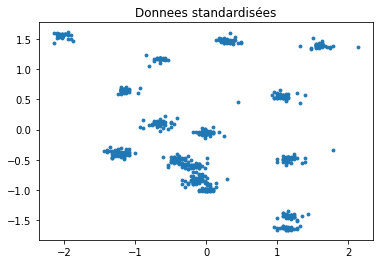

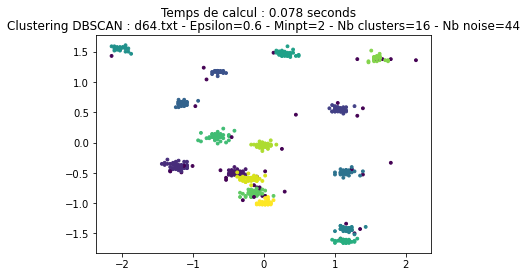

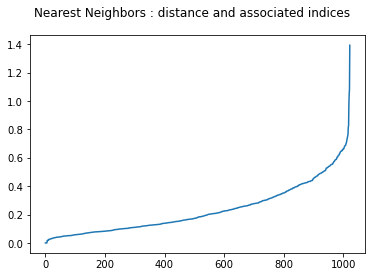

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

from scipy.io import arff
from sklearn import cluster
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
import pandas as pd

##################################################################
# READ a data set (arff format)

# Parser un fichier de données au format arff
# datanp est un tableau (numpy) d'exemples avec pour chacun la liste 
# des valeurs des features

# Note 1 : 
# dans les jeux de données considérés : 2 features (dimension 2 seulement)
# t =np.array([[1,2], [3,4], [5,6], [7,8]]) 
#
# Note 2 : 
# le jeu de données contient aussi un numéro de cluster pour chaque point
# --> IGNORER CETTE INFORMATION ....
#    2d-4c-no9.arff   xclara.arff
#  2d-4c-no4    spherical_4_3 
# cluto-t8-8k  cluto-t4-8k cluto-t5-8k cluto-t7-8k diamond9 banana

path = './new-data/'
filename = "d64.txt"
databrut = pd.read_csv(path+filename, sep=" ", encoding = "ISO-8859-1", skipinitialspace=True)
data = databrut
datanp = databrut.to_numpy()

########################################################################
# Preprocessing: standardization of data
########################################################################

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(datanp)

data_scaled = scaler.transform(datanp)

import scipy.cluster.hierarchy as shc

print("-------------------------------------------")
print("Affichage données standardisées            ")
f0_scaled = data_scaled[:,0] # tous les élements de la première colonne
f1_scaled = data_scaled[:,1] # tous les éléments de la deuxième colonne
#print(f0)
#print(f1)

plt.figure()
plt.scatter(f0_scaled, f1_scaled, s=8)
plt.title("Donnees standardisées")

########################################################################
# Run DBSCAN clustering method 
# for a given number of parameters eps and min_samples
#  
distance=0.6
min_pts=2
start = time.time()
cl_pred = cluster.DBSCAN(eps=distance, min_samples=min_pts).fit_predict(data_scaled)
end = time.time()

plt.figure()
# Plot results
plt.scatter(f0_scaled, f1_scaled, c=cl_pred, s=8)
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(cl_pred)) - (1 if -1 in cl_pred else 0)
n_noise_ = list(cl_pred).count(-1)
plt.title("Clustering DBSCAN : " + filename +" - Epsilon="+str(distance)+" - Minpt="+str(min_pts)+" - Nb clusters="+str(n_clusters_)+" - Nb noise="+str(n_noise_))
plt.suptitle("Temps de calcul : " + str(round(end - start, 4)) + " seconds")
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


fig = plt.figure()
fig.suptitle("Nearest Neighbors : distance and associated indices")
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data_scaled)
distances, indices = nbrs.kneighbors(data_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

# curv = Curvature(line=list(zip(indices,distances)))
# curv.calculate_curvature(gap=0)

# curv.plot_curvature()

# def derivative(x_data, y_data):
#     N = len(x_data)
#     delta_x = [x_data[i+1] - x_data[i] for i in range(N - 1)]
#     x_prim = [(x_data[i+1] + x_data[i]) / 2. for i in range(N - 1)]
#     y_prim = [(y_data[i+1] - y_data[i]) / delta_x[i] for i in range(N - 1)]
#     return x_prim, y_prim

# # curv_coefficients = []
# # for i in range(len(indices)):
# #     curv_coefficients = derivative(*derivative(indices[i], distances[i]))

# x, y = zip(*zip(indices, distances))  # a in an array you defined above
# x_bis, y_bis = derivative(*derivative(x, y))

# print(x_bis, y_bis)

# plt.figure()
# # Plot results
# plt.scatter(x_bis, y_bis, c='red', s=8)

plt.show()

########################################################################
# FIND "interesting" values of epsilon and min_samples 
# using distances of the k NearestNeighbors for each point of the dataset
#
# Note : a point x is considered to belong to its own neighborhood  
